---
title: keras教程-05-实验验证神经网络的深度-样本量-dropout
date: 2018-07-25 20:17:55
tags: [keras教程]
toc: true
xiongzhang: true

---
<span></span>
<!-- more -->


本文代码运行环境:

- windows10
- python3.6
- jupyter notebook
- tensorflow 1.x
- keras 2.x

### 神经网络有多少层比较合适

沈向洋在专访中表示:

>ResNet他们做了152层，然后后面又做了一个1001层的，孙剑他们做的。我一直对他们不太满意，所以他们做出了非常好的结果之后，我又问了他们一个非常基础的问题：你到底要多少层？这个问题一直没有得到回答。我觉得应该有人写这样一篇基础的论文（来回答这个问题），这肯定会是一篇获奖论文，这是毫无疑问的。 回到现在这个问题，到现在为止，大家肯定会觉得是越深越好。就是打仗要打刚仗，要上力度，GPU要多，数据要多。到现在为止，因为很多新的系统也不太一样，然后大家一般认为，更深更准还是一个趋势。就像AlphaGo他们讲出来就是做了50层，他也没讲为什么做50层，可能就是工程师弄了50层就差不多了。

所以通常神经网络到底要用多少层?这是一个重要也不重要的问题。

说重要是因为神经网络的深度的确影响它的性能。我们总是期望用最少的神经元最最多或者最好的事情。

说它不重要是因为, 我们往往在实践中发现, 你用50层还是51层, 网络的预测效果差不多。

### 我们现在讨论1层和10的差别

因为9层和10层的网络结构似乎没有太大差别, 但是如果层数差别太大, 可能效果就不一样了, 所以我们做一个实验, 比较一下神经网络的层数对神经网络的各方面指标的影响。

我们采用上一篇教程中用到的案例:  {% post_link keras教程-04-手写字体识别 %}

引入用到的库:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

d:\mysites\deeplearning.ai-master\.env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


我们把所有代码封装到一个函数里, 这样方便多次调用, 下面的代码和上一篇的代码一样, 只是调整了结构, 如果看不懂请返回上一篇有解释:

In [51]:
def prepare_data(n=6000, test_n=3000):
    '''准备用到的数据'''
    nb_classes = 10
    # 这个方法可以加载数据
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)
    X_train = X_train[:n, :]
    y_train = y_train[:n]
    X_test = X_test.reshape(10000, 784)
    X_test = X_test[:test_n, :]
    y_test = y_test[:test_n]
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    return (X_train, Y_train), (X_test, Y_test)

def net_work(n_layer, has_dropout=False):
    model = Sequential()
    assert n_layer >= 1
    for i in range(n_layer):
        if i == 0:
            model.add(Dense(512, input_shape=(784,)))
        else:
            model.add(Dense(512))
        model.add(Activation('relu'))
        if has_dropout:
            model.add(Dropout(0.2))
    # 输出层
    model.add(Dense(10))
    # 分类任务的输出通常是softmax, 这保证的所有的输出值都在0-1之间, 并且他们之和为1
    model.add(Activation('softmax')) 
    return model

def train(model, train_data, test_data):
    X_train, y_train = train_data
    X_test, y_test = test_data
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model.fit(X_train, y_train,
          batch_size=128, epochs=18,
          validation_data=(X_test, y_test))

下面我们迭代多种模型, 模型的层数分别是:1,3,5,7,9。

因为模型层数和样本量有很大关系, 样本量小的情况下更容易显示出神经网络层数太多造成的不利影响。

In [52]:
# prepare_data的第一个参数就是训练样本的样本量
train_data, test_data = prepare_data(1000)
results = {}

# 循环模型的层数
for i in range(5):
    n = i*2 + 1
    for dropout in (False, True):
        print(f'层数为: {n}, 是否使用dropout: {dropout}')
        model = net_work(n, dropout)
        results[(n, dropout)] = train(model, train_data, test_data)

层数为: 1, 是否使用dropout: False
Train on 1000 samples, validate on 3000 samples
Epoch 1/18
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6539 - acc: 0.5560 - val_loss: 1.2262 - val_acc: 0.6930
Epoch 2/18
1000/1000 [==============================] - 0s 148us/step - loss: 0.7366 - acc: 0.8280 - val_loss: 0.7899 - val_acc: 0.7660
Epoch 3/18
1000/1000 [==============================] - 0s 148us/step - loss: 0.4471 - acc: 0.8800 - val_loss: 0.6391 - val_acc: 0.8000
Epoch 4/18
1000/1000 [==============================] - 0s 151us/step - loss: 0.3269 - acc: 0.9160 - val_loss: 0.5804 - val_acc: 0.8237
Epoch 5/18
1000/1000 [==============================] - 0s 151us/step - loss: 0.2615 - acc: 0.9370 - val_loss: 0.5186 - val_acc: 0.8390
Epoch 6/18
1000/1000 [==============================] - 0s 154us/step - loss: 0.2128 - acc: 0.9510 - val_loss: 0.5216 - val_acc: 0.8393
Epoch 7/18
1000/1000 [==============================] - 0s 154us/step - loss: 0.1714 - acc: 0.9650 - val_loss: 

Epoch 5/18
1000/1000 [==============================] - 0s 269us/step - loss: 0.2152 - acc: 0.9390 - val_loss: 0.5393 - val_acc: 0.8280
Epoch 6/18
1000/1000 [==============================] - 0s 269us/step - loss: 0.1482 - acc: 0.9600 - val_loss: 0.4698 - val_acc: 0.8580
Epoch 7/18
1000/1000 [==============================] - 0s 276us/step - loss: 0.1066 - acc: 0.9720 - val_loss: 0.4797 - val_acc: 0.8573
Epoch 8/18
1000/1000 [==============================] - 0s 290us/step - loss: 0.0765 - acc: 0.9810 - val_loss: 0.4954 - val_acc: 0.8540
Epoch 9/18
1000/1000 [==============================] - 0s 273us/step - loss: 0.0670 - acc: 0.9800 - val_loss: 0.6527 - val_acc: 0.8270
Epoch 10/18
1000/1000 [==============================] - 0s 325us/step - loss: 0.0441 - acc: 0.9870 - val_loss: 0.5724 - val_acc: 0.8543
Epoch 11/18
1000/1000 [==============================] - 0s 264us/step - loss: 0.0479 - acc: 0.9890 - val_loss: 0.5865 - val_acc: 0.8480
Epoch 12/18
1000/1000 [=======================

1000/1000 [==============================] - 1s 611us/step - loss: 0.1252 - acc: 0.9680 - val_loss: 0.7168 - val_acc: 0.8530
Epoch 14/18
1000/1000 [==============================] - 1s 649us/step - loss: 0.1073 - acc: 0.9660 - val_loss: 0.7792 - val_acc: 0.8437
Epoch 15/18
1000/1000 [==============================] - 1s 725us/step - loss: 0.0887 - acc: 0.9760 - val_loss: 0.9286 - val_acc: 0.8243
Epoch 16/18
1000/1000 [==============================] - 1s 737us/step - loss: 0.0816 - acc: 0.9770 - val_loss: 0.8026 - val_acc: 0.8423
Epoch 17/18
1000/1000 [==============================] - 1s 809us/step - loss: 0.0635 - acc: 0.9820 - val_loss: 0.8739 - val_acc: 0.8393
Epoch 18/18
1000/1000 [==============================] - 1s 632us/step - loss: 0.0763 - acc: 0.9800 - val_loss: 0.8235 - val_acc: 0.8477


下面将训练过程中的各个指标进行可视化:

d:\mysites\deeplearning.ai-master\.env\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


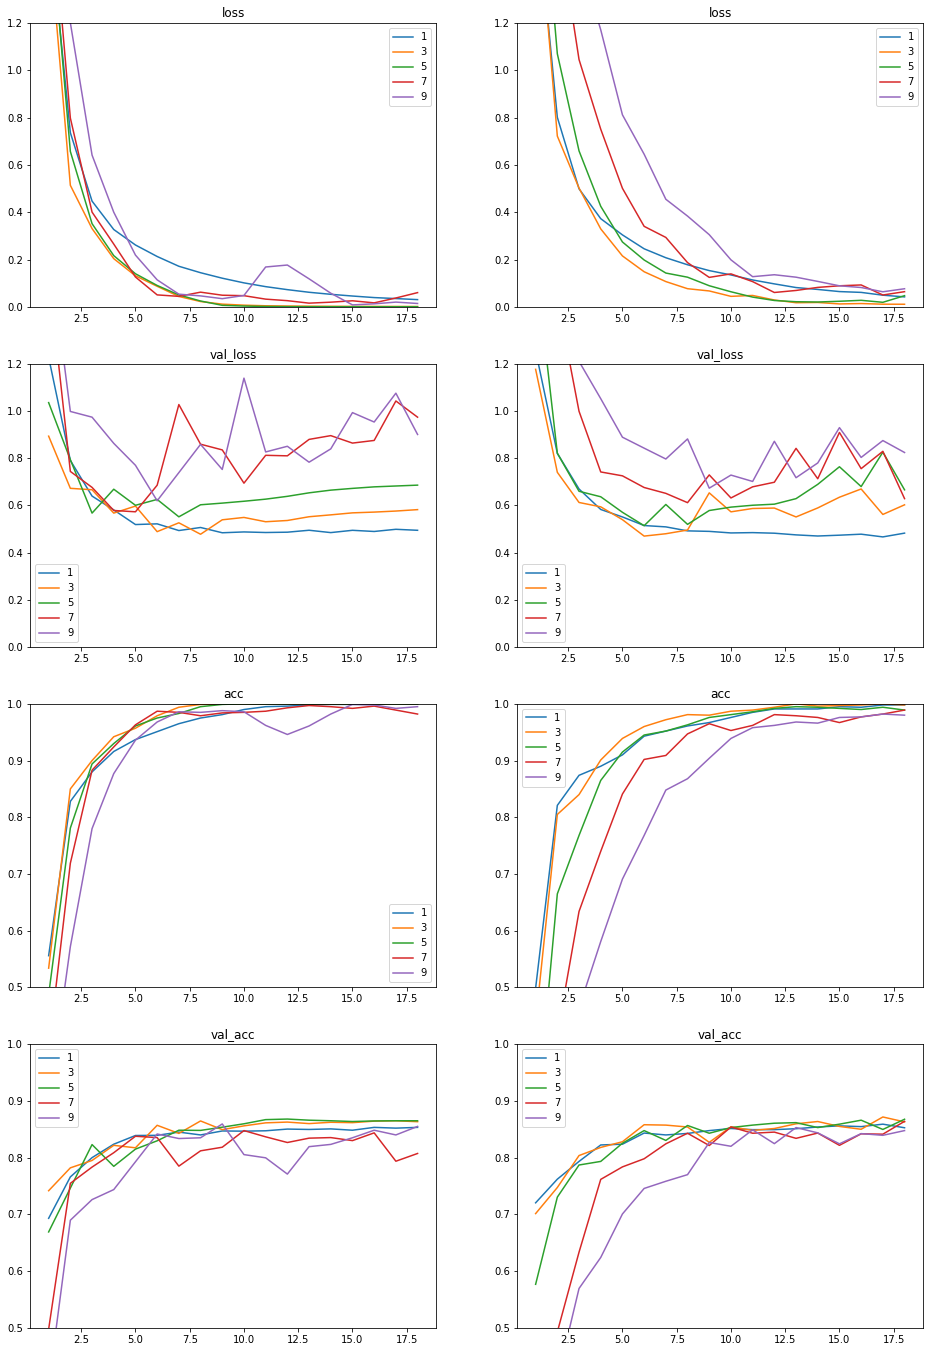

In [53]:
%matplotlib inline

plt.figure(figsize=(16,24))

i = 0
for metric in ('loss', 'val_loss', 'acc', 'val_acc'):
    i += 1
    
    for n, dropout in results:
        plt.subplot(4, 2, i * 2 - 1+dropout)
        r = results[(n, dropout)]
        data = r.history[metric]
        plt.plot(range(1, len(data)+1), data,  label=str(n))
        plt.title(metric)
        if metric in ('loss', 'val_loss'):
            plt.ylim(0,1.2)
        else:
            plt.ylim(0.5,1)

        plt.legend()
        

从上面的图中你可能会看出, 在样本量较小或有限的情况下, 模型越复杂, 层数越多, 越容易导致过拟合(测试样本集表现差于训练样本, 并且测试集方差变大), 并且层数越多测试集的表现可能越差。

然而, 如果你加大训练样本量, 这种情况就会缓解, 甚至消失。

dropout效果是让loss曲线更平滑, 方差变小, 缓解过拟合。